# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

C:\Users\armat\AppData\Local\Temp\ipykernel_8728\3783113820.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

#Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city. recieved assistance from LA to make this work
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | konarka
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | jiayuguan
Processing Record 6 of Set 1 | gebre guracha
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | popondetta
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | luanda
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | nishinoomote
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | martapura
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | zemio
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | vorg

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,16.18,74,98,1.37,NZ,1706411715
1,konarka,19.9000,86.1167,19.22,55,30,2.94,IN,1706411715
2,bilibino,68.0546,166.4372,-27.06,99,100,2.61,RU,1706411716
3,happy valley-goose bay,53.3168,-60.3315,-1.83,74,75,4.12,CA,1706411716
4,jiayuguan,39.8167,98.3000,-5.08,29,1,1.04,CN,1706411716


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,16.18,74,98,1.37,NZ,1706411715
1,konarka,19.9000,86.1167,19.22,55,30,2.94,IN,1706411715
2,bilibino,68.0546,166.4372,-27.06,99,100,2.61,RU,1706411716
3,happy valley-goose bay,53.3168,-60.3315,-1.83,74,75,4.12,CA,1706411716
4,jiayuguan,39.8167,98.3000,-5.08,29,1,1.04,CN,1706411716


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

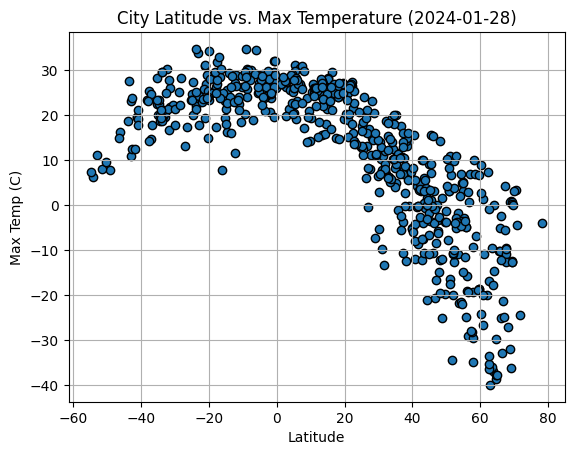

In [43]:
# Build scatter plot for latitude vs. temperature. added edgecolors so its easier to see the points.
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-01-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

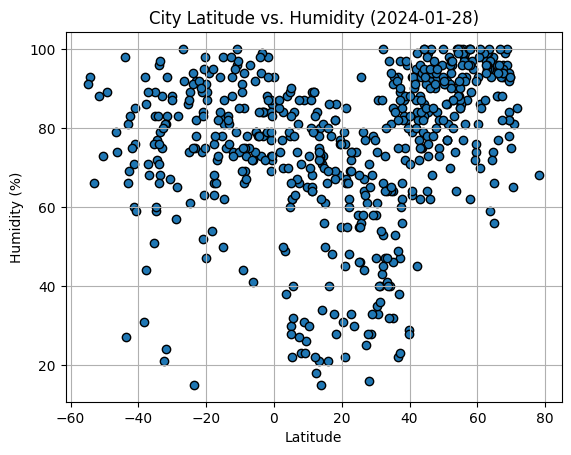

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

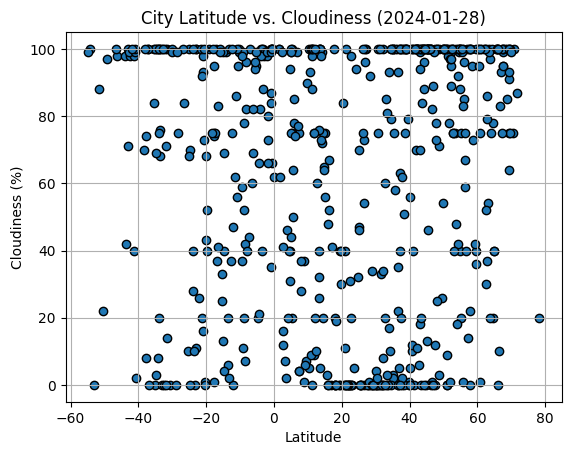

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

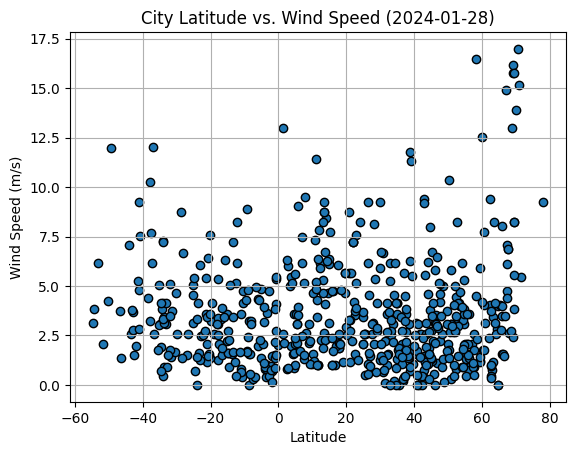

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots. added text_coordinates for easier control of where the line equation shows up.
def linregress_plots(x_values, y_values, title, text_coordinates):
    #line equation for the linear regression. 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    #adding in plots and lines
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,konarka,19.9000,86.1167,19.22,55,30,2.94,IN,1706411715
2,bilibino,68.0546,166.4372,-27.06,99,100,2.61,RU,1706411716
3,happy valley-goose bay,53.3168,-60.3315,-1.83,74,75,4.12,CA,1706411716
4,jiayuguan,39.8167,98.3000,-5.08,29,1,1.04,CN,1706411716
5,gebre guracha,9.8000,38.4000,14.33,65,90,1.06,ET,1706411716


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,16.18,74,98,1.37,NZ,1706411715
8,popondetta,-8.7537,148.2534,30.23,66,78,3.23,PG,1706411717
10,luanda,-8.8368,13.2343,25.92,85,52,2.40,AO,1706411718
11,grytviken,-54.2811,-36.5092,6.25,93,100,3.82,GS,1706411718
16,ushuaia,-54.8000,-68.3000,7.38,91,99,3.12,AR,1706411673


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8287985762037817


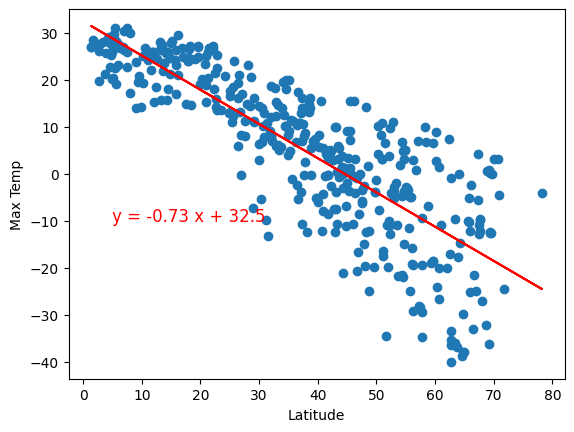

In [70]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linregress_plots(x_values, y_values, "Max Temp", (5, -10))

The r-squared is: 0.557063068250134


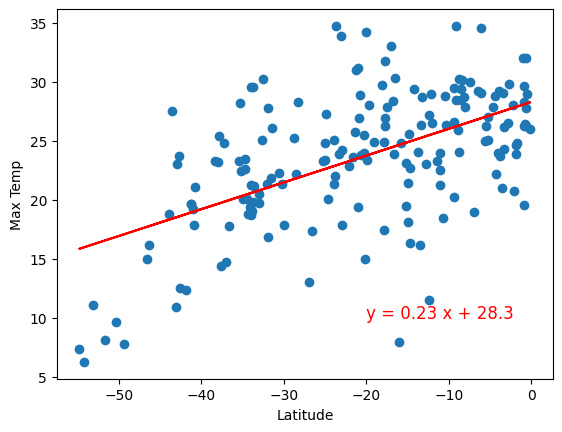

In [84]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linregress_plots(x_values, y_values, "Max Temp", (-20, 10))

**Discussion about the linear relationship:** In the northern hemisphere, there is a strong negative correlation between latitude and maximum temperature, with an r-squared value of -0.82. This makes sense, as the higher the latitude (further towards the poles) one is located, the colder the temperatures would likely be. The southern hemisphere showed a similar relationship, with an r-squared of 0.55, showing temperatures generally increasing closer to the equator. The equator (latitude 0), in general, has the warmest temperatures, and the poles have the coldest temperatures, so the further north or south you would go, the colder the temperatures are likely to be. I noticed that there are more cities in the northern hemisphere, with many reaching closer to the poles. Looking at a map, there is more landmass in the northern hemisphere, and very little landmass in the far south of the southern hemisphere, which may account for the less significant relationship between latitude and max temperature, and the warmer recorded temperatures overall. It should also be noted that in late January, cities in the northern hemisphere experience winter while cities in the southern hemisphere experience summer.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.5113560530175525


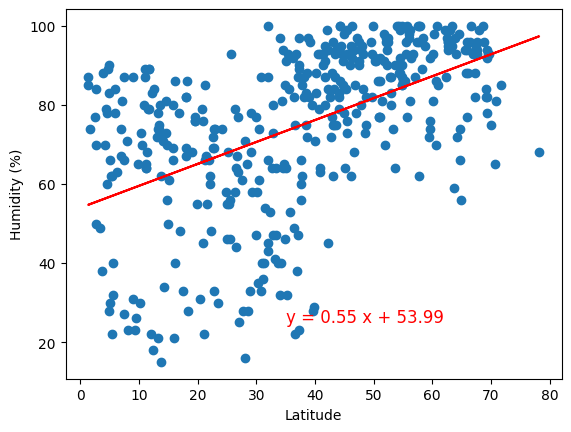

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linregress_plots(x_values, y_values, "Humidity (%)", (35,25))

The r-squared is: 0.16638689181587343


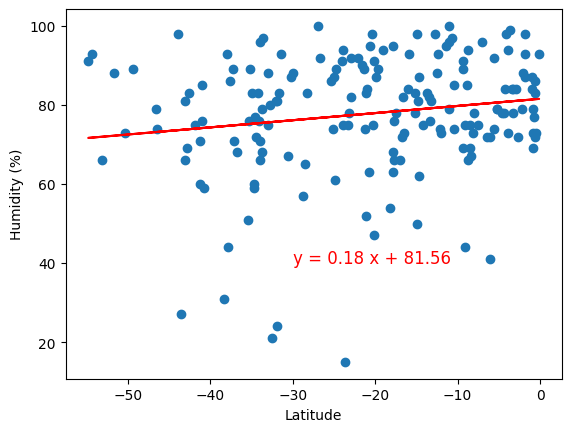

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linregress_plots(x_values, y_values, "Humidity (%)", (-30, 40))

**Discussion about the linear relationship:** In the northern hemisphere, humidity trended higher at higher latitudes, with a 0.51 r-squared value. In the southern hemisphere, humidity trended slightly higher towards the equator, with an r-squared of 0.17. There was a lot of variance within the results in both the north and south equators, suggesting that factors other than latitude had a stronger impact on the humidity of a city. In the southern hemisphere, there are very few datapoints below -45 degree latitude, while in the northern hemisphere there are many datapoints above 45 degree latitude, with high humidities recorded there. There is reason to suspect that higher humidities are correlated with greater latitudes, but without many city datapoints to go off of in the southern hemisphere, it can't be said conclusively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.28339411456050695


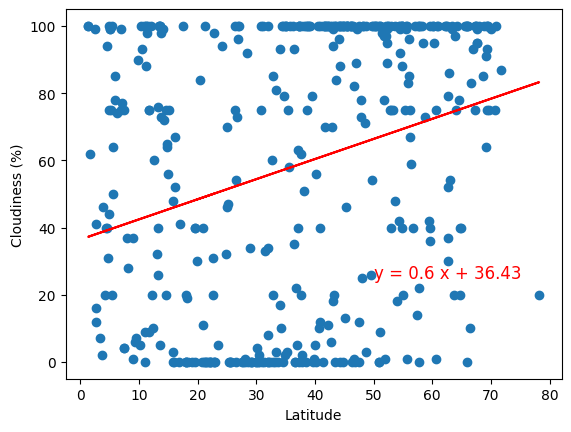

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linregress_plots(x_values, y_values, "Cloudiness (%)", (50,25))

The r-squared is: 0.04170601579176469


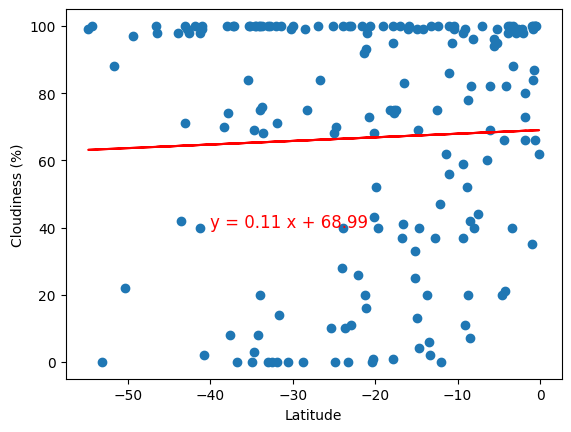

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linregress_plots(x_values, y_values, "Cloudiness (%)", (-40, 40))

**Discussion about the linear relationship:** There is very little correlation between latitude and cloudiness in this dataset. Datapoints were concentrated around 0 and 100% in the northern hemisphere, with a 0.28 r-squared value, showing generally higher cloud cover at higher latitudes, but not a significant one. The relationship in the southern hemisphere was even less correlated, with cloud cover values equally dispersed throughout the latitudes. Plotting humidity vs. cloud cover would be interesting, as I believe that these variables would be more highly correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06061089937526799


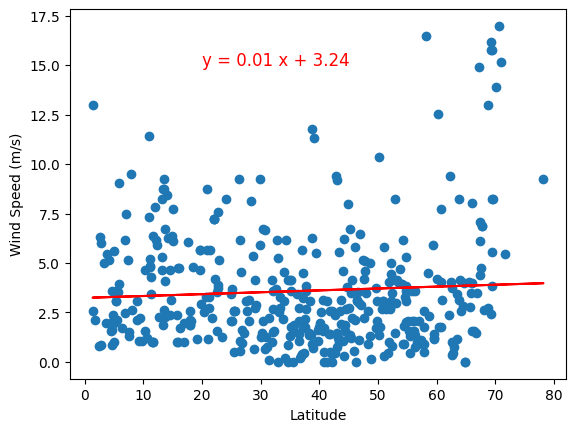

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linregress_plots(x_values, y_values, "Wind Speed (m/s)", (20, 15))

The r-squared is: -0.31622653584851124


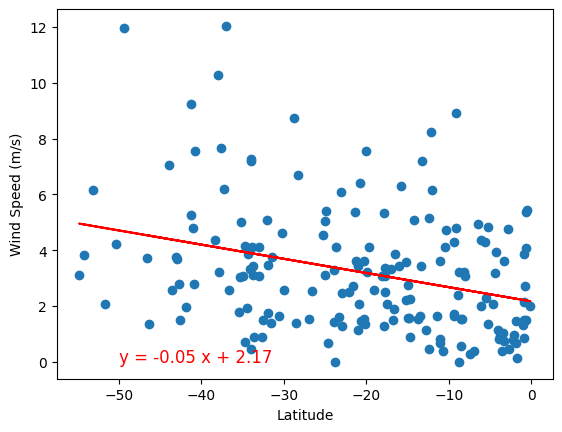

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linregress_plots(x_values, y_values, "Wind Speed (m/s)", (-50,0))

**Discussion about the linear relationship:** There was no correlation between latitude and wind speed in the northern hemisphere, and a slightly negative correlation in the southern hemisphere. Wind speed was generally higher closer to the poles, but the majority of the cities in this dataset had temperate windspeeds. 